# Persiapan Data
split dan definision data

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00


In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import GridSearchCV, KFold
import statsmodels.api as sm
import statsmodels.api as smapi
from sklearn.model_selection import TimeSeriesSplit
pd.set_option('display.max_columns', None)

In [ ]:
Dataset = pd.read_csv("/content/drive/MyDrive/Case Study Data Scientist/AllData.csv")
Dataset.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [ ]:
# Mengubah tipe data kolom 'Date' menjadi datetime
Dataset['Date'] = pd.to_datetime(Dataset['Date'])
# Pastikan 'Date' merupakan tipe data datetime
Dataset['Date'] = pd.to_datetime(Dataset['Date'])
# Atur 'Date' sebagai indeks
Dataset.set_index('Date', inplace=True)
Dataset.head()

,TransactionID,CustomerID,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
Date,,,,,,,,,,,,,,,,,,
2022-01-01,TR11369,328,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2022-07-17,TR89318,183,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2022-09-26,TR9106,123,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2022-08-01,TR4331,335,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2022-10-01,TR6445,181,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


['Crackers' 'Oat' 'Thai Tea' 'Choco Bar' 'Coffee Candy' 'Yoghurt'
 'Ginger Candy' 'Cheese Stick' 'Cashew' 'Potato Chip']

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah QTY harian
daily_qty = Dataset.groupby('Date')['Qty'].sum().reset_index()

# Mengubah kolom 'Date' menjadi indeks tanggal
daily_qty.set_index('Date', inplace=True)

# Menampilkan hasil
print(daily_qty)

            Qty
Date           
2022-01-01   49
2022-01-02   50
2022-01-03   76
2022-01-04   98
2022-01-05   67
...         ...
2022-12-27   70
2022-12-28   68
2022-12-29   42
2022-12-30   40
2022-12-31   37

[365 rows x 1 columns]


# ARIMA MODEL TO ALL PRODUK

In [ ]:

# Gunakan Auto ARIMA pada data harian
Parammodel_ALL = auto_arima(daily_qty['Qty'], seasonal=False)

# Menampilkan parameter terbaik
print("Best Parameters untuk total qty all product:", Parammodel_ALL.order)

Best Parameters untuk total qty all product: (0, 0, 0)


In [ ]:
#SPLITDATA 80:20
train_all, test_all = daily_qty[:int(len(daily_qty)*0.8)], daily_qty[int(len(daily_qty)*0.8):]

In [ ]:
daily_qty_record = daily_qty.shape[0]
latih_record = train_all.shape[0]
uji_record = test_all.shape[0]
print("Jumlah record Data : ", daily_qty_record)
print("======Split 80:20=========")
print("Jumlah record Data latih: ", latih_record)
print("Jumlah record Data Uji: ", uji_record)

Jumlah record Data :  365
======Split 80:20=========
Jumlah record Data latih:  292
Jumlah record Data Uji:  73


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define p, d, and q parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Seasonal component (set to 12 for monthly data)

best_aic = float('inf')  # Initialize the AIC score to positive infinity
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_all['Qty'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print("Best SARIMA order:", best_order)
print("Best seasonal SARIMA order:", best_seasonal_order)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best SARIMA order: (1, 0, 1)
Best seasonal SARIMA order: (0, 1, 1, 12)


In [ ]:
# Best SARIMA order and seasonal order from the previous step
best_order = (1, 0, 1)
best_seasonal_order = (0, 1, 1, 12)

# Create and fit SARIMA model
sarima_model = SARIMAX(train_all, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_model_fit = sarima_model.fit()

# Print the SARIMA model summary
print(sarima_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                Qty   No. Observations:                  292
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1134.922
Date:                            Thu, 26 Oct 2023   AIC                           2277.845
Time:                                    14:13:08   BIC                           2292.179
Sample:                                01-01-2022   HQIC                          2283.603
                                     - 10-19-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9263      0.024     38.727      0.000       0.879       0.973
ma.L1         -1.0000      7.935   

In [ ]:
# Hitung berapa banyak data yang ada dalam data test_all
forecast_period = len(test_all)

# Buat forecast_index untuk memulai dari setelah data test_all
forecast_index = pd.date_range(start=test_all.index[-1], periods=forecast_period)

# Buat data prediksi Anda
forecast = sarima_model_fit.get_forecast(steps=forecast_period)
forecast_df = forecast.summary_frame()
forecast_df = forecast_df.rename(columns={'mean': 'Qty'})
forecast_df.index = forecast_index

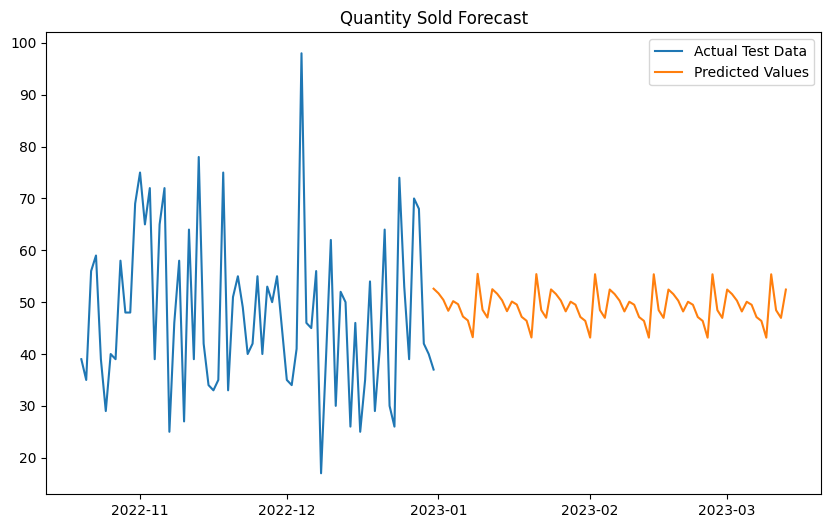

In [ ]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(test_all.index, test_all['Qty'], label='Actual Test Data')
plt.plot(forecast_df.index, forecast_df['Qty'], label='Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

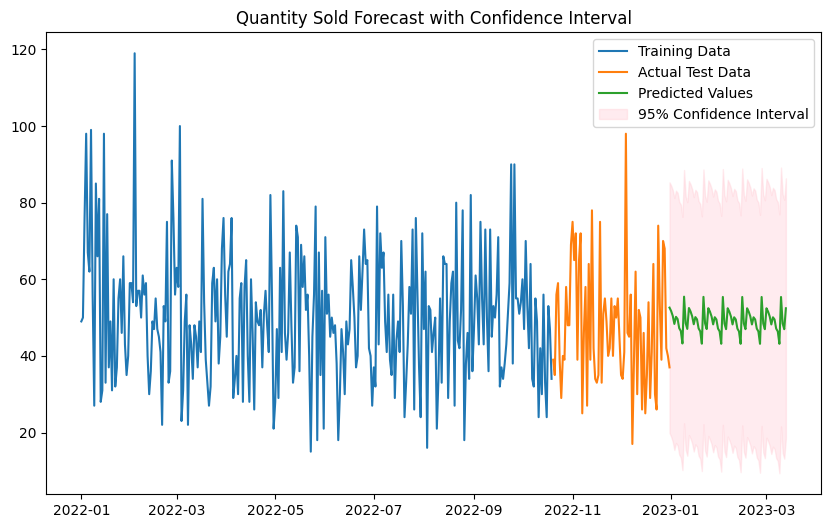

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_all.index, train_all['Qty'], label='Training Data')

# Plot data test
plt.plot(test_all.index, test_all['Qty'], label='Actual Test Data')

# Plot hasil prediksi
plt.plot(forecast_df.index, forecast_df['Qty'], label='Predicted Values')

# Plot interval kepercayaan
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Quantity Sold Forecast with Confidence Interval')
plt.legend()
plt.show()

In [ ]:
# Check Mean Quantity Sold per Day di hasil prediksi
mean_qty_per_day = forecast_df['Qty'].mean()
print("Mean Quantity Sold per Day in Forecast:", mean_qty_per_day)

Mean Quantity Sold per Day in Forecast: 49.2010884538023


#-